# Reddit comments scrapper

## Start programme

In [1]:
# widgets
from ipywidgets import interact, interactive
import ipywidgets as widgets
from IPython.display import display, Markdown


!apt update

from google.colab import files
import pandas as pd
import numpy as np
import json
import os


# reddit scrapper
!pip install praw

import praw
from praw.models import MoreComments
import pandas as pd
from google.colab import files
from praw.models import MoreComments

# mount google drive
from google.colab import drive
import glob
drive.mount('/content/drive')

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:9 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [85.6 kB]
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [824 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports In

## If you use the programme for the 1st time and you do not have a reddit API authorisation scroll down to the section 'Authorise reddit API' and follow the instructions there

## Scrap comments

In [2]:
url = "https://www.reddit.com/r/Polska/comments/m5v7wj/status_tvp_rozjebane/"

#@title Reddit thread link
display(Markdown("paste the URL of the reddit thread to scrap the comments"))
reddit_link_input_field = widgets.Text(
    placeholder = 'Reddit thread link',
    description='',
    disabled=False,
)
display(reddit_link_input_field)

paste the URL of the reddit thread to scrap the comments

Text(value='', placeholder='Reddit thread link')

In [4]:
#@title Collect comments from chosen thread
# setting reddit API credentials
with open('/content/drive/My Drive/reddit_credentials/reddit_credentials.json') as json_file:
    reddit_credentials = json.load(json_file)

 

reddit = praw.Reddit(
    client_id=reddit_credentials['client_id'],
    client_secret=reddit_credentials['client_secret'],
    redirect_url="http://localhost:8080",
    user_agent=reddit_credentials['user_agent'],
)

# getting reddit thread URL value
reddit_link = reddit_link_input_field.value
submission = reddit.submission(url=reddit_link)

# scrapping comments
comments = []

submission.comments.replace_more(limit=None)
comment_queue = submission.comments[:]  # Seed with top-level
while comment_queue:
    comment = comment_queue.pop(0)
    comments.append(comment.body)
    comment_queue.extend(comment.replies)

comments_df = pd.DataFrame(comments, columns=['comment'])

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



In [5]:
#@title Download collected comments in chosen format

# button onclick function
def saveFile(dummy):
  format = formatChoice.value
  if format == 'csv':
    comments_df.to_csv('comments.csv', index=False) 
  elif format == 'xlsx':
    comments_df.to_excel('comments.xlsx', index=False)
  elif format == 'txt':
    comments_df.to_csv('comments.txt', sep='\t') 
  files.download(f'comments.{format}')
  display(Markdown(f'{format} file saved'))

formatChoice =widgets.ToggleButtons(
    options=['txt', 'csv', 'xlsx'],
    description='format',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    # tooltips=[],
#     icons=['check'] * 3
)
button = widgets.Button(
    description='save',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click to download',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)
display(formatChoice)
print('')

button.on_click(saveFile)
display(button)

ToggleButtons(description='format', options=('txt', 'csv', 'xlsx'), value='txt')

Button(description='save', icon='check', style=ButtonStyle(), tooltip='Click to download')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

xlsx file saved

## Authorise reddit API

Go to link https://www.reddit.com/prefs/apps



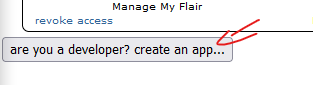

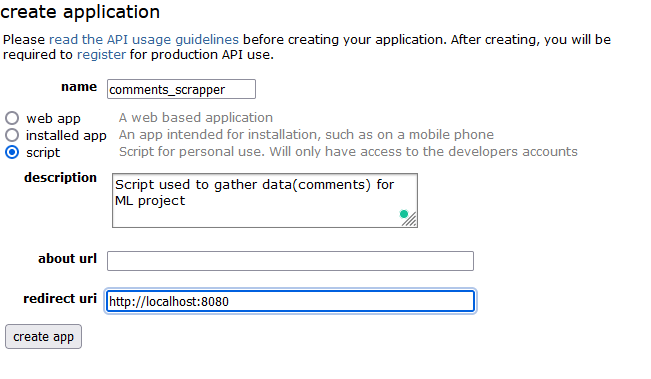


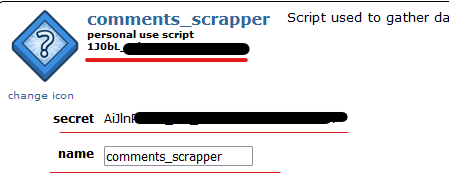

In [4]:
#@title client_id 
display(Markdown("put you client_id here  (shown on screenshot above)"))

client_id_input_field = widgets.Text(
    placeholder = 'client_id',
    description='',
    disabled=False,
)
display(client_id_input_field)

put you client_id here  (shown on screenshot above)

Text(value='', placeholder='client_id')

In [9]:
#@title client_secret

display(Markdown("put you client_secret here  (shown on screenshot above)"))

client_secret_input_field = widgets.Text(
    placeholder = 'client_secret',
    description='',
    disabled=False,
)
display(client_secret_input_field)

put you client_secret here  (shown on screenshot above)

Text(value='', placeholder='client_secret')

In [5]:
#@title client_secret

display(Markdown("put you user_agent (name) here  (shown on screenshot above)"))

user_agent_input_field = widgets.Text(
    placeholder = 'user_agent',
    description='',
    disabled=False,
)
display(user_agent_input_field)

put you user_agent (name) here  (shown on screenshot above)

Text(value='', placeholder='user_agent')

In [29]:
#@title Save credentials as json on your Google Drive for further use

def makeDirectory(dir_name):
    if not os.path.exists(dir_name):
        os.mkdir(dir_name)

client_id = client_id_input_field.value
client_secret = client_secret_input_field.value
user_agent = user_agent_input_field.value

reddit_credentials = {"client_id": client_id,
                      "client_secret": client_secret,
                      "user_agent": user_agent}

makeDirectory("/content/drive/My Drive/reddit_credentials")
with open('/content/drive/My Drive/reddit_credentials/reddit_credentials.json', 'w') as outfile:
    json.dump(reddit_credentials, outfile, indent=4)
